In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from definitions import data_source_path, treatment_countries, fig_size, \
show_plots, save_figs, show_output, target_var, country_col, date_col, incl_countries, incl_years, fake_num, country_name_formal, var_name_formal
from helper_functions_general import read_data, get_impl_date, get_trans, get_timescale, get_data_path, get_fig_path, get_table_path, get_model_color
from plot_functions import plot_corr

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.linear_model import Lasso

from definitions import fig_size, show_plots, save_figs, treatment_countries, country_name_formal
from helper_functions_general import get_impl_date, get_fig_path, get_formal_title, get_model_color

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.stattools import adfuller

In [29]:
timeframe = 'm'
treatment_country = 'ireland'

In [30]:
def get_file(model):
    return f'{model}_{treatment_country}_{timeframe}_act_pred_log_diff'

In [31]:
model = 'lasso'
lasso = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
lasso = lasso[['date', 'act', 'pred']].rename(columns={'pred': model})

# lasso
# lasso.plot()

In [32]:
model = 'rf'
rf = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
rf = rf[['date', 'act', 'pred']].rename(columns={'pred': model})

# rf
# rf.plot()

In [33]:
model = 'ols'
ols = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
ols = ols[['date', 'act', 'pred']].rename(columns={'pred': model})

# ols
# ols.plot()

In [34]:
model = 'sc'
sc = read_data(source_path=get_table_path(timeframe=timeframe, folder='results', country=treatment_country, model=model), file_name=get_file(model))
sc = sc[['date', 'act', 'pred']].rename(columns={'pred': model})

# sc
# sc.plot()

In [35]:
key_cols = ['date', 'act']

total = lasso.copy()
total = pd.merge(left=total, right=ols)
total = pd.merge(left=total, right=rf)
total = pd.merge(left=total, right=sc)

total = total.set_index('date')
total

,act,lasso,ols,rf,sc
date,,,,,
2001-01-01,0.083624,-0.004606,0.045446,0.021619,-0.073019
2001-02-01,0.066749,-0.004606,0.000535,0.018823,-0.017062
2001-03-01,0.112298,-0.004606,0.003514,0.035315,-0.040807
2001-04-01,0.012458,-0.004606,0.029428,0.012628,0.090582
2001-05-01,0.025783,-0.004606,-0.003622,0.035579,0.037213
...,...,...,...,...,...
2019-06-01,-0.028505,-0.004606,-0.027154,-0.017971,-0.031865
2019-07-01,-0.024543,-0.004606,-0.053765,-0.015485,-0.031651
2019-08-01,-0.020030,-0.004606,-0.021301,-0.017246,-0.032226


# PRED

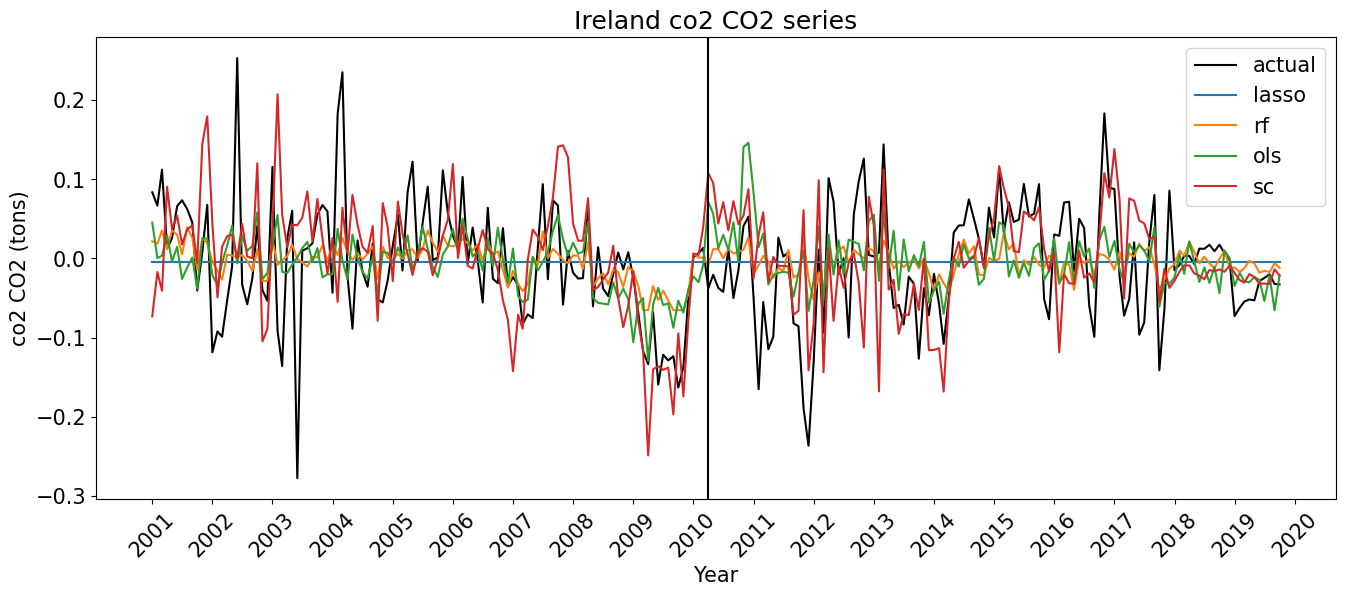

In [36]:
df = total.copy()
var_name = 'co2'

fig_size = (16,6)

df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(df['act'], label='actual', color='black')
for model_alt in ['lasso', 'rf', 'ols', 'sc']:
    ax.plot(df[model_alt], label=model_alt)
ax.axvline(x=get_impl_date(treatment_country, input='dt'), color=get_model_color(type='impl'))

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

if treatment_country in country_name_formal.keys():
    ax.set_title(f'{country_name_formal[treatment_country]} {get_formal_title(var_name=var_name)} CO2 series')
else:
    ax.set_title(f'{get_formal_title(var_name=var_name)} CO2 series')
ax.set_xlabel('Year')
ax.set_ylabel(f'{get_formal_title(var_name=var_name)} CO2 (tons)')
ax.legend(loc='best')

plt.show()

# CUMSUM

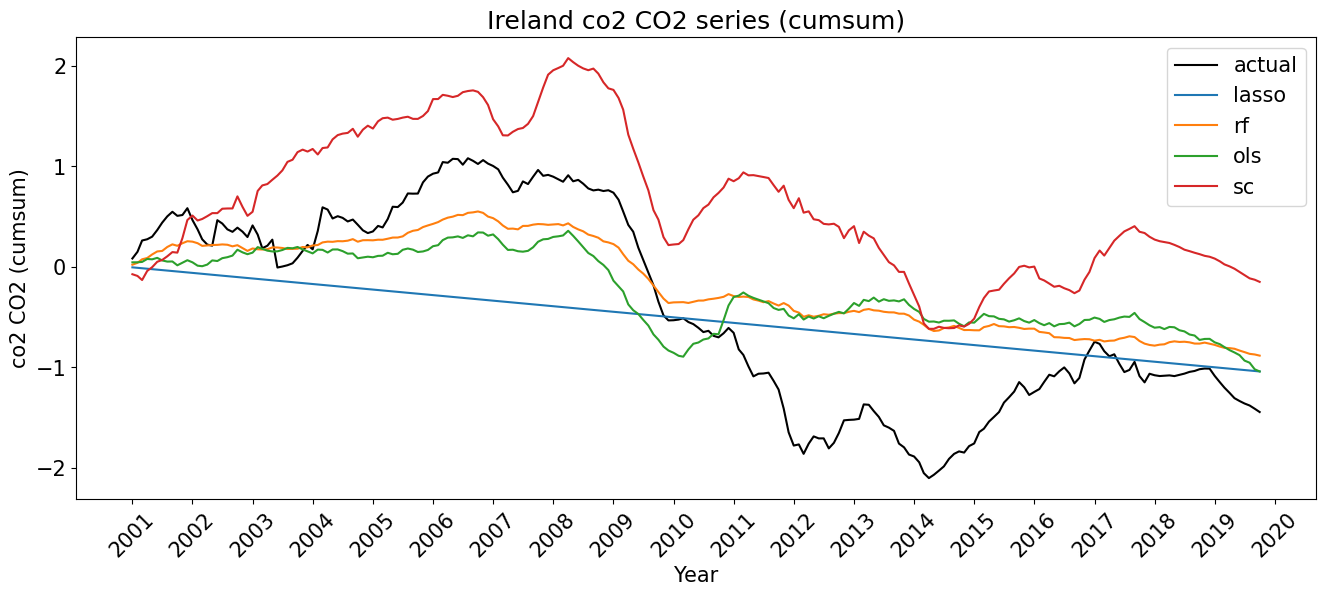

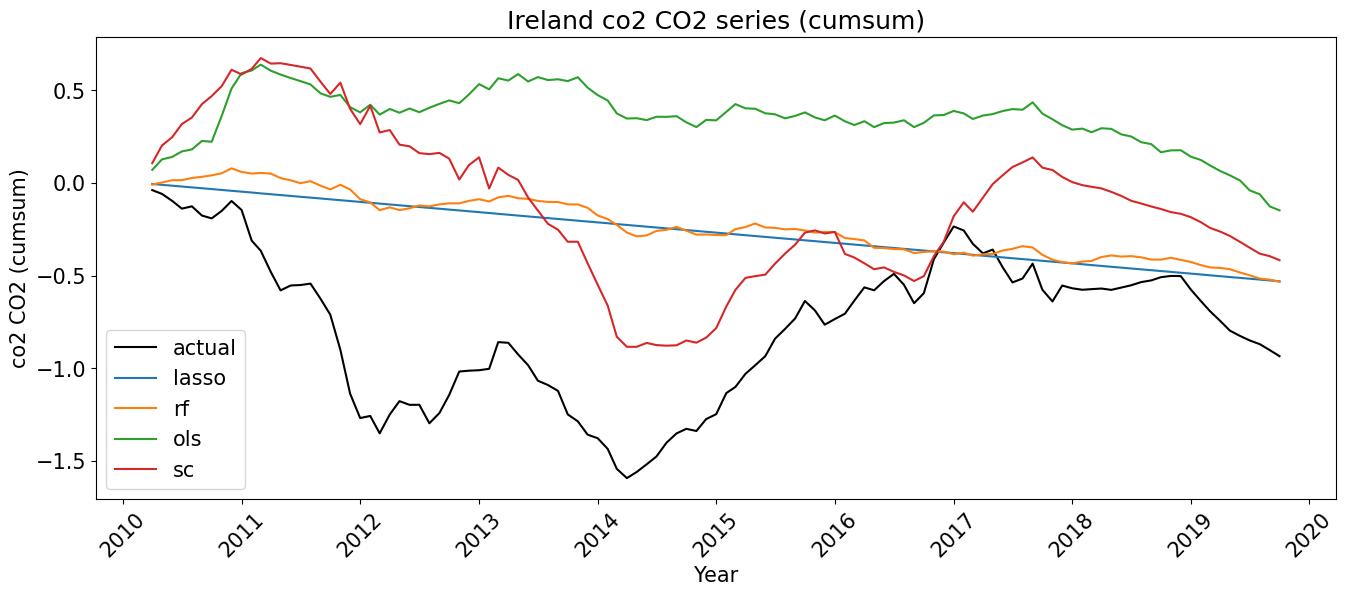

In [37]:
df = total.copy()
var_name = 'co2'

fig_size = (16,6)

df.index = pd.to_datetime(df.index)
# df = df[df.index >= get_impl_date(treatment_country)]

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(df['act'].cumsum(), label='actual', color='black')
for model_alt in ['lasso', 'rf', 'ols', 'sc']:
    ax.plot(df[model_alt].cumsum(), label=model_alt)
# ax.axvline(x=get_impl_date(treatment_country, input='dt'), color=get_model_color('impl'))

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

if treatment_country in country_name_formal.keys():
    ax.set_title(f'{country_name_formal[treatment_country]} {get_formal_title(var_name=var_name)} CO2 series (cumsum)')
else:
    ax.set_title(f'{get_formal_title(var_name=var_name)} CO2 series (cumsum)')
ax.set_xlabel('Year')
ax.set_ylabel(f'{get_formal_title(var_name=var_name)} CO2 (cumsum)')
ax.legend(loc='best')
plt.show()


df = df[df.index >= get_impl_date(treatment_country)]

fig, ax = plt.subplots(figsize=fig_size)
ax.plot(df['act'].cumsum(), label='actual', color='black')
for model_alt in ['lasso', 'rf', 'ols', 'sc']:
    ax.plot(df[model_alt].cumsum(), label=model_alt)
# ax.axvline(x=get_impl_date(treatment_country, input='dt'), color=get_model_color('impl'))

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

if treatment_country in country_name_formal.keys():
    ax.set_title(f'{country_name_formal[treatment_country]} {get_formal_title(var_name=var_name)} CO2 series (cumsum)')
else:
    ax.set_title(f'{get_formal_title(var_name=var_name)} CO2 series (cumsum)')
ax.set_xlabel('Year')
ax.set_ylabel(f'{get_formal_title(var_name=var_name)} CO2 (cumsum)')
ax.legend(loc='best')

plt.show()